In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from bs4 import BeautifulSoup

# Load JSON data
with open('responses.json', 'r') as file:
    data = json.load(file)

In [37]:
# rows with categories
rows_with_categories = []
for row in data:
    if 'category' in row['data'] and len(row['data']['category']) > 0:
        rows_with_categories.append(row['data']['category'])
    else:
        rows_with_categories.append(None)

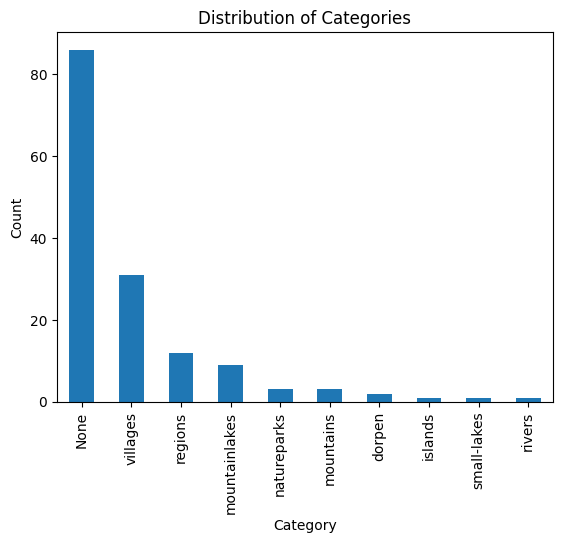

In [38]:
# distribution of categories but include None
categories = pd.Series(rows_with_categories)
categories.value_counts(dropna=False).plot.bar()
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [39]:
rows_with_image_count = []
for row in data:
    if 'image' in row['data'] and len(row['data']['image']) > 0:
        rows_with_image_count.append(len(row['data']['image']))
    else:
        rows_with_image_count.append(0)

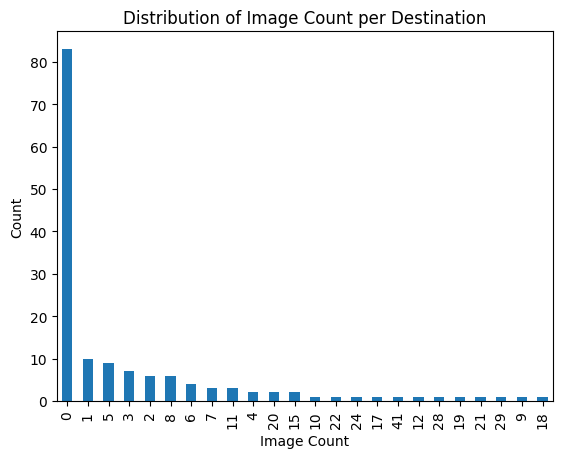

In [40]:
# distribution of image count
image_count = pd.Series(rows_with_image_count)
image_count.value_counts().plot.bar()
plt.title('Distribution of Image Count per Destination')
plt.xlabel('Image Count')
plt.ylabel('Count')
plt.show()


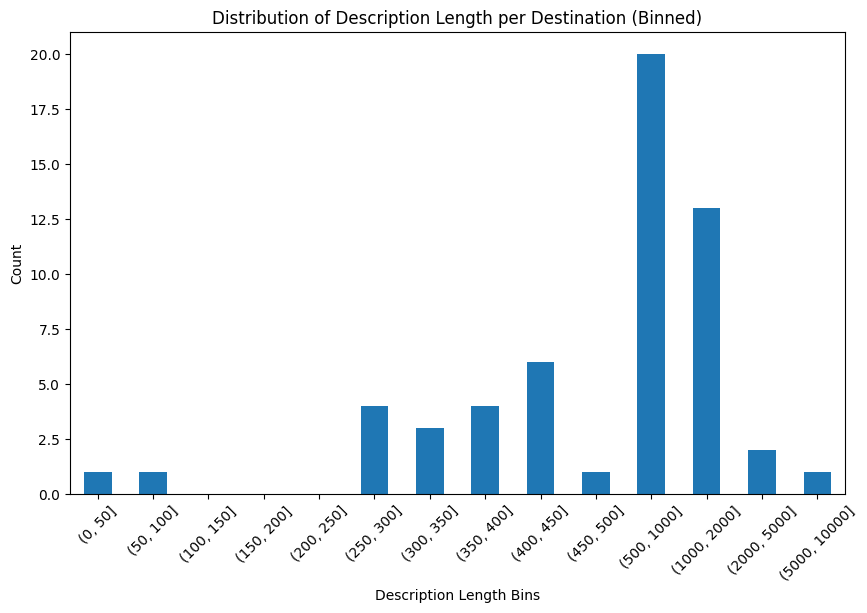

In [41]:
rows_with_description_length = []
for row in data:
    if 'description' in row['data'] and len(row['data']['description']) > 0:
        rows_with_description_length.append(len(row['data']['description']))
    else:
        rows_with_description_length.append(0)

# Create a Pandas Series
description_length = pd.Series(rows_with_description_length)

# Define bin edges
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 2000, 5000, 10000]

# Create bins and plot
plt.figure(figsize=(10, 6))
description_length_bins = pd.cut(description_length, bins=bins)
description_length_bins.value_counts().sort_index().plot.bar()
plt.title('Distribution of Description Length per Destination (Binned)')
plt.xlabel('Description Length Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [42]:
# plot the total number of destinations
total_destinations = len(data)
print('Total Destinations: {}'.format(total_destinations))


Total Destinations: 149


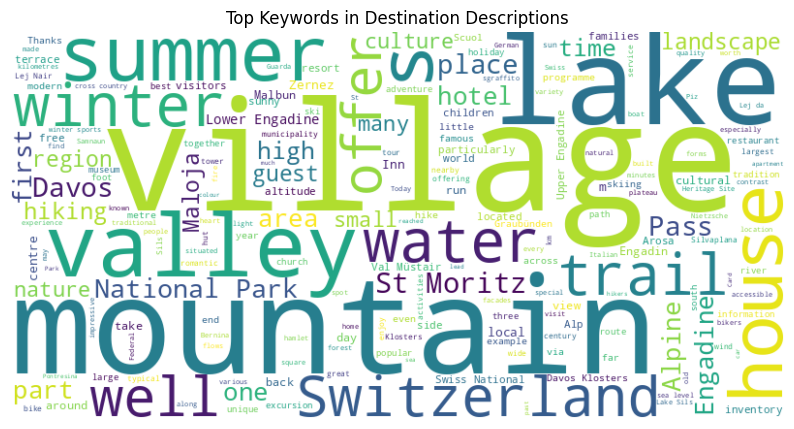

In [43]:
keywords = []

for row in data:
    # remove html elements
    if 'description' in row['data']:
        new_row = row['data']
        new_row['description'] = row['data']['description'].replace('<br />', ' ')
        cleaned_description = BeautifulSoup(new_row['description'], 'html.parser').get_text(separator=' ')
        keywords.extend(cleaned_description.split(' '))

# Combine keywords into a single string
keywords_text = ' '.join(keywords)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords in Destination Descriptions')
plt.show()